## Implement linear regression from scratch using torch
## 3 steps for any model
1) Design a model (input size, output size, forward pass)
2) Construct loss and optimizer
3) Implement actual training
    1) forward pass - compute prediction and loss
    2) backward pass - compute gradients wrt loss
    3) update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt



In [2]:
## prepare data. create a regression dataset using make_regression

In [3]:
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state=1)

In [5]:
print(X_numpy.shape, y_numpy.shape)


(100, 1) (100,)


In [6]:
## First have to convert numpy arrays into pytorch tensors
## cast double to float 32

In [7]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [9]:
X.shape

torch.Size([100, 1])

In [10]:
y.shape

torch.Size([100])

In [11]:
## have to convert y to shape 100,1 instead of 1

In [12]:
y = y.view(y.shape[0], 1)

In [13]:
y.shape

torch.Size([100, 1])

In [14]:
## get number of samples and no of features

In [15]:
n_samples, n_feature = X.shape

In [16]:
## Step 1:  design a model

In [22]:
input_size = n_feature
output_size = y.shape[1]
model = nn.Linear(input_size, output_size )

In [18]:
## Construct loss and optimizer

In [24]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [19]:
## training loop

epoch : 10, loss : 4344.7778
epoch : 20, loss : 3244.5513
epoch : 30, loss : 2447.7939
epoch : 40, loss : 1870.2225
epoch : 50, loss : 1451.1503
epoch : 60, loss : 1146.8210
epoch : 70, loss : 925.6431
epoch : 80, loss : 764.7805
epoch : 90, loss : 647.7068
epoch : 100, loss : 562.4500


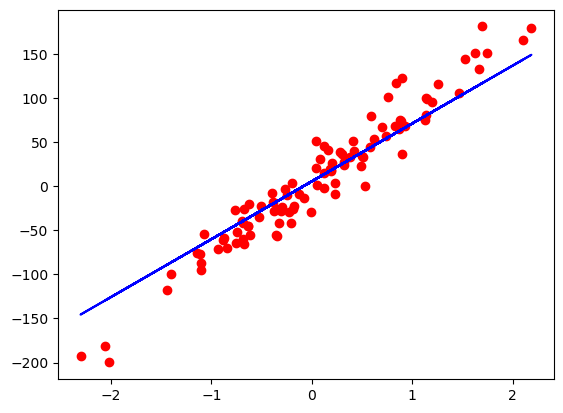

In [25]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    ## backward pass - updating gradients
    loss.backward() ## computes local gradients
    
    ## update weights
    optimizer.step() ## update weights
    
    ## zero gradients
    optimizer.zero_grad()
    
    if ((epoch+1)%10)==0:
        print(f'epoch : {epoch + 1}, loss : {loss.item():.4f}')
        
## plot
predicted = model(X).detach().numpy() ## necessary to remove gradients
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()




    

## References

1) https://www.youtube.com/watch?v=YAJ5XBwlN4o&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=7